## Basics

In [3]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.fftpack import dct

In [5]:
sample_rate, signal = scipy.io.wavfile.read('talk.wav')  

signal = signal[0:int(3 * sample_rate)]  
# Keep the first 3 seconds

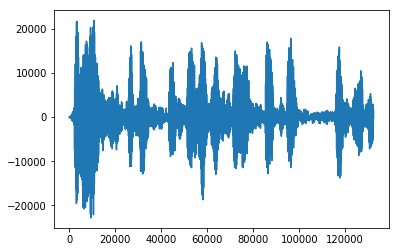

In [6]:
plt.plot(signal)

## Pre-Emphasis

Why:
- balance spectrum, high frequency have smaller amplitude
- avoid numerical problems fft
- improve SNR

In [8]:
pre_emphasis = 0.97

In [9]:
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

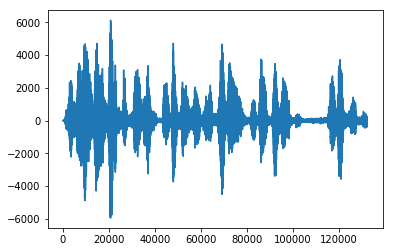

In [10]:
plt.plot(emphasized_signal)

## Framing

typical frame range 20 - 40 ms with 10ms step (15ms overlap)

In [12]:
frame_size = 0.025

In [14]:
frame_stride = 0.01

In [15]:
frame_length, frame_step = \
frame_size * sample_rate, frame_stride * sample_rate  
    # Convert from seconds to samples
    # next line continue -> \
    
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = \
    int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  
# Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z) 
# Pad Signal to make sure that all frames 
# have equal number of samples without truncating any
# samples from the original signal

indices = \
    np.tile(np.arange(0, frame_length), (num_frames, 1)) + \
    np.tile(np.arange(0, num_frames * frame_step, frame_step), \
               (frame_length, 1)).T

frames = pad_signal[indices.astype(np.int32, copy=False)]

## Window

Why:
- fft data is infinite 
- to reduce spectral leakage

In [16]:
frames *= np.hamming(frame_length)

In [17]:
NFFT = 512

## Fourier-Transform and Power Spectrum

In [18]:
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum